# <b>IFI 8420 - Final Project</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

Introduction

<hr>

#### Installing all the requirement packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

#### Getting the State Energy Data System (SEDS) data provided by the U.S. Department of Energy, The Energy Information Administration (EIA) API
https://www.eia.gov/opendata/browser/seds
<br>The EIA browser API generates a url that has a built in offset value, as well as a request max limit of 5000. Since we want more than 5000 items, using Offest Pagination allows us to run a while loop that will grab the next 5000 items until the total set amount of items is reached. This is possible because the browser API also tells you how many total items your request generates.

In [4]:
# import requests

# api_key = 'v4Mpa3bxglq7V73FG1c9siXRib7Rtvsi6k17OSV5'
# offset = 0
# total = 2242317
# data = []

# while offset < total:
#     url = ('https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&sort[0][column]=seriesId&sort[0][direction]=desc&offset=' + str(offset) + '&length=5000')
#     response = requests.get(url, headers={'X-API-Key': api_key})
    
#     if response.status_code == 200:
#         data.extend(response.json()['response']['data'])
#         offset += 5000
#     else:
#         print('Error ' + str(response.status_code) + ': ' + response.text)
#         break

# print('Successfully retrieved ' + str(len(data)) + ' rows.')

In [5]:
# df = pd.DataFrame(paginated_data)
# df.head()

In [6]:
# df.to_csv('EIA_raw.csv')

In [7]:
EIA_raw_df = pd.read_csv('EIA_raw.csv')
EIA_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB


In [8]:
EIA_raw_df.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


#### Visualizing the SEDS data

In [9]:
# Simple regex filtering of the data to grab rows with renewable energy keywords only
renew_keywords = ['solar', 'wind', 'renewable', 'hydroelectric', 'geothermal', 'hydropower', 'total energy']
nonrenew_keywords = ['diesel', 'oil', 'gasoline', 'coal', 'fossil', 'hydrocarbon', 'nuclear', 'wood']
include_pattern = '|'.join(renew_keywords)
exclude_pattern = '|'.join(nonrenew_keywords)

EIA_renewable = EIA_raw_df[EIA_raw_df['seriesDescription'].str.contains(include_pattern, case=False, na=False) & ~EIA_raw_df['seriesDescription'].str.contains(exclude_pattern, case=False, na=False)]

In [10]:
EIA_renewable = EIA_renewable.drop(columns=['Unnamed: 0'])
EIA_renewable.reset_index(drop=True, inplace=True)
EIA_renewable.index = EIA_renewable.index + 1
EIA_renewable.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
1,2012,WYTXP,Wind energy total end-use net generation,NV,Nevada,0.0,Million kilowatthours
2,1967,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
3,1966,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
4,1965,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
5,1964,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours


In [11]:
# Solar Energy filtered dataframe
solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
state_vals = solar_df.groupby('stateId')['value'].sum()
state_vals_sorted = state_vals.sort_values(ascending=False)
state_vals_sorted.drop('US', inplace=True)

In [12]:
smallest_year = solar_df['period'].min()
largest_year = solar_df['period'].max()
print(smallest_year)
print(largest_year)

1960
2023


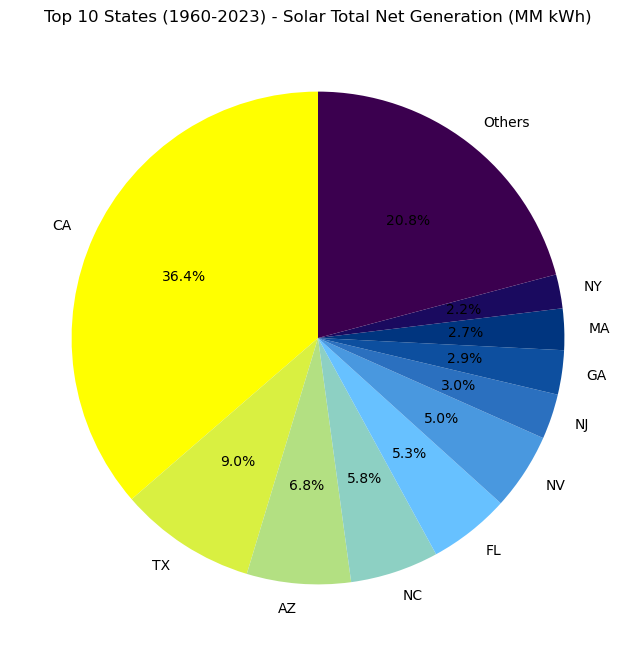

In [13]:
top_10 = state_vals_sorted.iloc[:10]
others = state_vals_sorted.iloc[10:].sum()
top_10['Others'] = others

plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Solar Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_solar_states.png')
plt.show()

In [14]:
# Wind Energy filtered dataframe
wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
state_vals_2 = wind_df.groupby('stateId')['value'].sum()
state_vals_sorted_2 = state_vals_2.sort_values(ascending=False)
state_vals_sorted_2.drop('US', inplace=True)

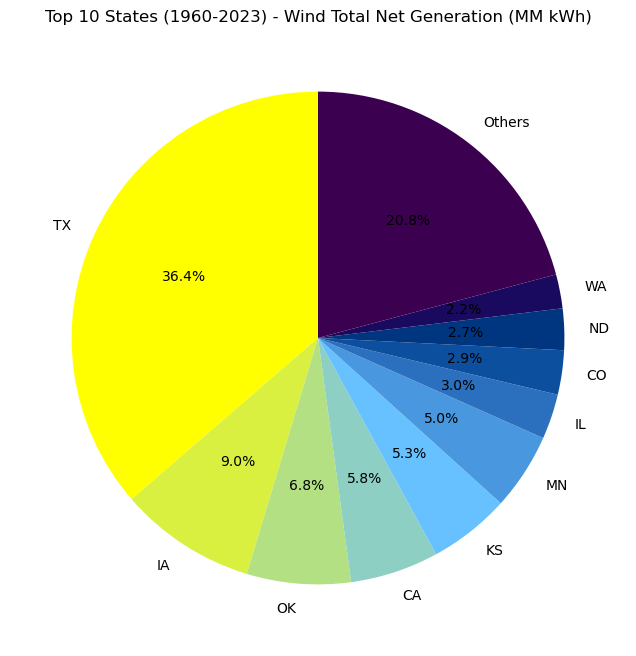

In [15]:
# Selecting the top 10 states after sorting by descending order
top_10_2 = state_vals_sorted_2.iloc[:10]
others_2 = state_vals_sorted_2.iloc[10:].sum()
top_10_2['Others'] = others_2

# Creating the graph
plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10_2.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Wind Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_wind_states.png')
plt.show()

In [16]:
pip install --upgrade geopandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
import geopandas as gpd
import os

# Solar Energy Geopandas Graph
solar_df_2 = EIA_renewable[(EIA_renewable['seriesId'] == 'SOTGP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)] # Grabbing values for this 10-year period

# Limiting to just the state IDs and the total value over 10 years
state_vals_2 = solar_df_2.groupby('stateId')['value'].sum()
state_vals_2.drop('US', inplace=True)

In [18]:
# Merging the TIGER/Line Shapefilea data from the US Census with our filtered EIA data
os.environ['GDAL_DATA'] = r"C:\Users\Mina\anaconda3\Library\share\gdal"
gdf = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf = gdf.merge(state_vals_2, left_on='STUSPS', right_on='stateId', how='left')

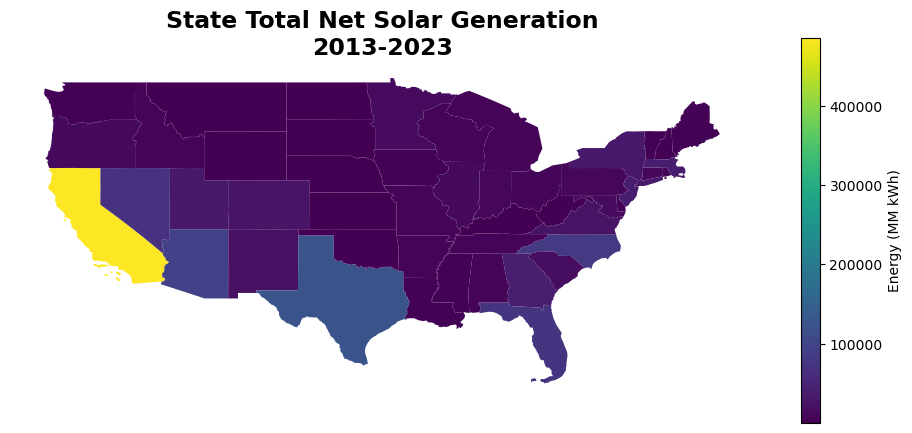

In [19]:
# Filtering out Alaska and Hawaii for a cleaner graph
continental_us = gdf[~gdf['STUSPS'].isin(['AK', 'HI'])]
# Creating the graph
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Solar Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_solar_states.png')
plt.show()

In [20]:
# Wind Energy Geopandas Graph
wind_df = EIA_renewable[(EIA_renewable['seriesId'] == 'WYTCP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)]

state_vals_3 = wind_df.groupby('stateId')['value'].sum()
state_vals_3.drop('US', inplace=True)

In [21]:
os.environ['GDAL_DATA'] = r"C:\Users\Mina\anaconda3\Library\share\gdal"
gdf_2 = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf_2 = gdf_2.merge(state_vals_3, left_on='STUSPS', right_on='stateId', how='left')

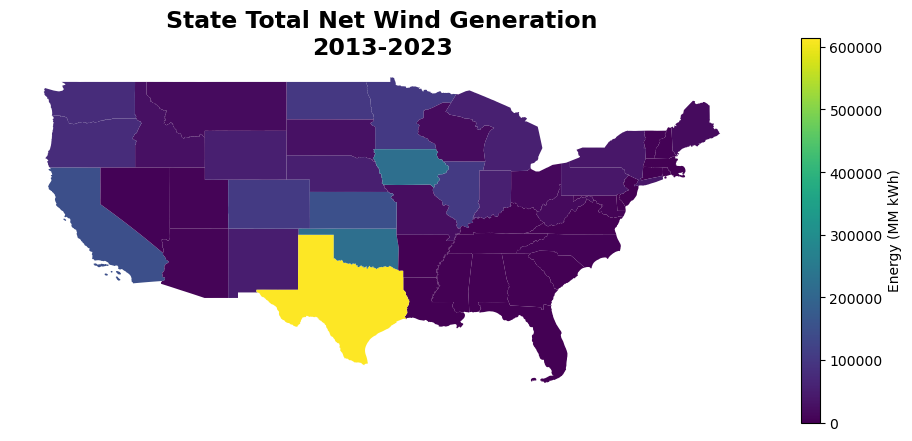

In [22]:
continental_us_2 = gdf_2[~gdf_2['STUSPS'].isin(['AK', 'HI'])]
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us_2.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Wind Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_wind_states.png')
plt.show()

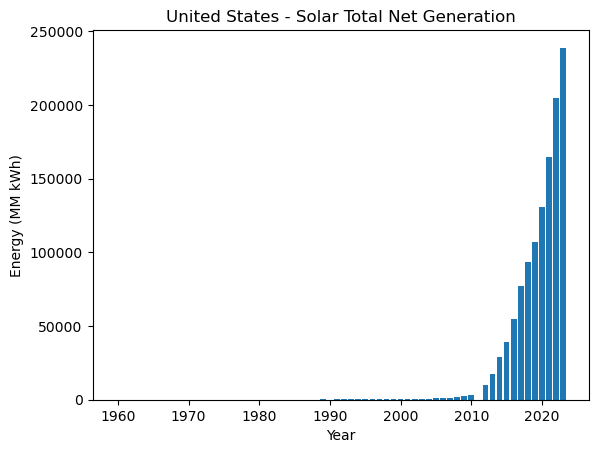

In [23]:
# US Total Solar Graph
us_solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
us_solar_values = us_solar_df[us_solar_df['stateId'] == 'US']

plt.bar(us_solar_values['period'], us_solar_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Solar Total Net Generation')
plt.savefig('us_solar_total.png', bbox_inches='tight')
plt.show()

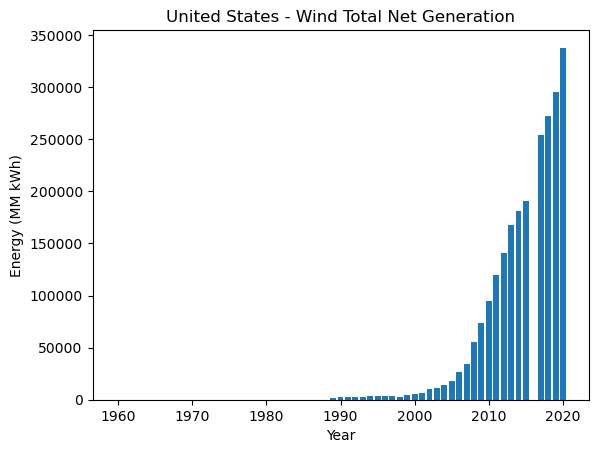

In [24]:
# US Total Wind Graph
us_wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
us_wind_values = us_wind_df[us_wind_df['stateId'] == 'US']

plt.bar(us_wind_values['period'], us_wind_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Wind Total Net Generation')
plt.savefig('us_wind_total.png', bbox_inches='tight')
plt.show()

<hr>

#### Getting the Extreme Weather data

In [25]:
pip install openpyxl

In [26]:
import openpyxl
df_data = pd.read_excel("exWeather_PV_data.xlsx", sheet_name="data")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   randid                    51504 non-null  object        
 1   Date                      51504 non-null  datetime64[ns]
 2   NOAAClimRegion            51504 non-null  object        
 3   TempZone                  51504 non-null  object        
 4   HumidZone                 51504 non-null  object        
 5   bin_PlantSize_kW          51504 non-null  object        
 6   plant_age_months          51356 non-null  float64       
 7   active_snow_tickets       51504 non-null  object        
 8   snow_bin_ticket_minutes   790 non-null    object        
 9   snow_affected_assets      790 non-null    object        
 10  snow_production_level     51437 non-null  object        
 11  PR                        49940 non-null  float64       
 12  snow_value_mm     

In [27]:
df_data.head()

,randid,Date,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,...,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
0,C2S1,2018-04-01,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
1,C2S1,2018-04-02,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
2,C2S1,2018-04-03,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
3,C2S1,2018-04-04,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0
4,C2S1,2018-04-05,West,T6,H4,large,19.0,No,NaN,NaN,...,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,0.0


In [28]:
df_data.describe()

,Date,plant_age_months,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,wind_speed_mean,rain_value_mm,nearest_rain,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,51504,51356.000000,49940.000000,45682.000000,45327.000000,51504.000000,39226.000000,45753.000000,51504.000000,40337.000000,40703.000000,51504.000000,51504.000000,45753.000000,51504.000000,51504.000000,45753.000000,51504.000000,51504.000000,40703.000000
mean,2018-11-25 01:57:22.311276800,39.707726,0.623206,1.257194,2.927878,0.305297,105.063318,0.007082,328.895018,3.829663,2.302144,46.778444,0.007184,0.003978,0.408745,1519.576460,0.001530,0.606458,1624.949984,0.281011
min,2018-02-22 00:00:00,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-08-20 00:00:00,20.000000,0.586168,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,1.179193,0.000000,1.000000,0.000000,0.000000,0.000000,206.000000,0.000000,0.000000,700.000000,0.000000
50%,2018-11-19 00:00:00,36.000000,0.753464,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,1.950687,0.000000,6.000000,0.000000,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,0.000000
75%,2019-02-14 00:00:00,55.000000,0.805191,0.000000,0.000000,1.000000,0.000000,0.000000,354.000000,3.440875,0.235467,73.000000,0.000000,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,1.000000
max,2020-03-01 00:00:00,123.000000,1.199583,275.737309,301.904108,1.000000,3614.551523,1.000000,354.000000,2672.129065,278.525241,169.000000,1.000000,1.000000,1440.000000,2420.000000,1.000000,1440.000000,2255.000000,1.000000
std,NaN,25.254713,0.299353,10.556568,17.889680,0.460537,396.042228,0.083854,77.013566,35.112970,8.147026,66.988867,0.084454,0.062946,18.914858,1070.425033,0.039085,25.353251,877.195268,0.449498


In [29]:
# Show only columns with missing values
missing = df_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

hurr_bin_ticket_minutes     51035
hurr_affected_assets        51035
storm_bin_ticket_minutes    50956
storm_affected_assets       50956
snow_affected_assets        50714
snow_bin_ticket_minutes     50714
cumulative_snow_mm          12278
wind_speed_mean             11167
rain                        10801
rain_value_mm               10801
total_daily_snow_mm          6177
snow_value_mm                5822
storm                        5751
flood                        5751
hurricane                    5751
PR                           1564
plant_age_months              148
snow_production_level          67
storm_production_level         58
hurr_production_level          17
dtype: int64

#### Visualising the Extreme Weather data

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_data[['Date', 'rain', 'duration_minutes_storm', 'rain_value_mm', 'wind_speed_mean']].describe()

,Date,rain,duration_minutes_storm,rain_value_mm,wind_speed_mean
count,51504,40703.000000,51504.000000,40703.000000,40337.000000
mean,2018-11-25 01:57:22.311276800,0.281011,0.408745,2.302144,3.829663
min,2018-02-22 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2018-08-20 00:00:00,0.000000,0.000000,0.000000,1.179193
50%,2018-11-19 00:00:00,0.000000,0.000000,0.000000,1.950687
75%,2019-02-14 00:00:00,1.000000,0.000000,0.235467,3.440875
max,2020-03-01 00:00:00,1.000000,1440.000000,278.525241,2672.129065
std,NaN,0.449498,18.914858,8.147026,35.112970


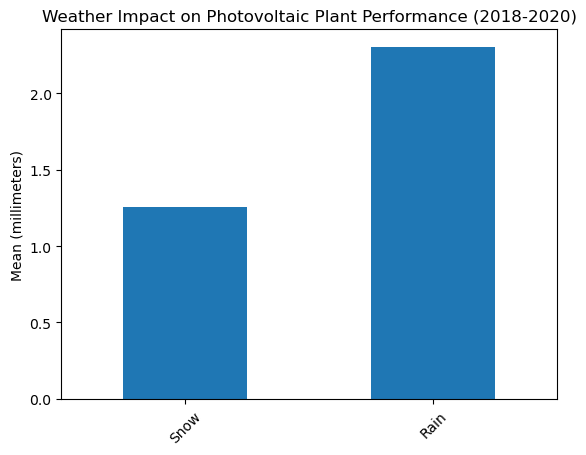

In [32]:
ax =(df_data[['snow_value_mm', 'rain_value_mm']].mean().plot(kind='bar', title='Weather Impact on Photovoltaic Plant Performance (2018-2020)', ylabel='Mean (millimeters)', rot=45))
ax.set_xticklabels(['Snow', 'Rain'])
plt.savefig('snow_rain_impact.png', bbox_inches='tight')

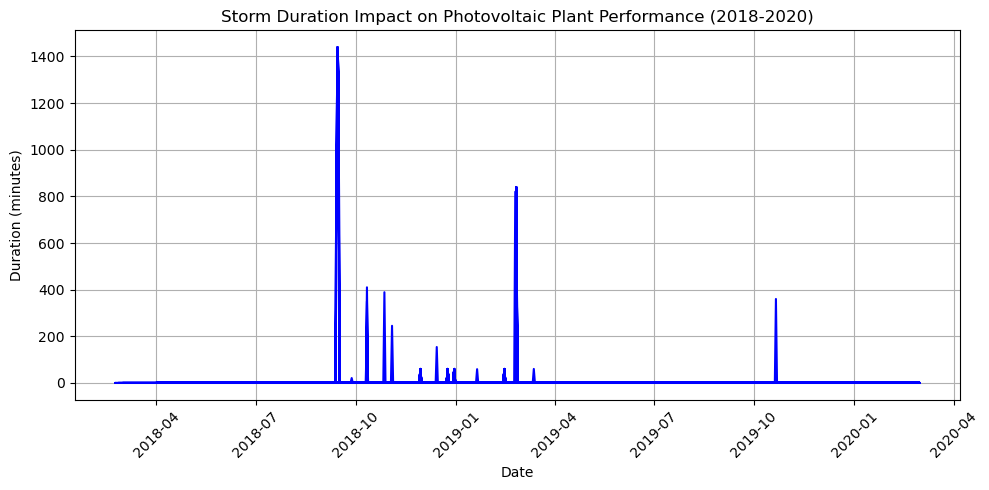

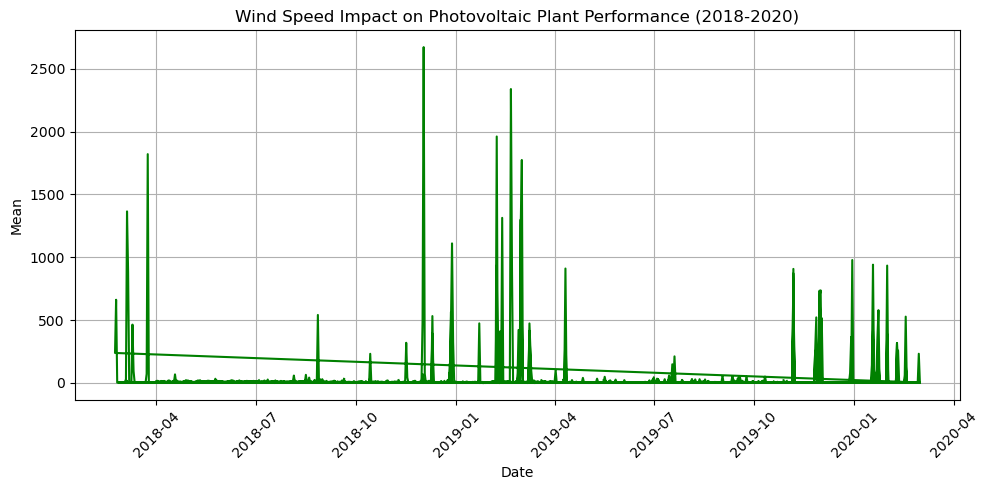

In [33]:
# Storm Duration
plt.figure(figsize=(10, 5))
plt.plot(df_data['Date'], df_data['duration_minutes_storm'], color='blue')
plt.title('Storm Duration Impact on Photovoltaic Plant Performance (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('storm_duration_impact.png', bbox_inches='tight')
plt.show()

# Wind Speed
plt.figure(figsize=(10, 5))
plt.plot(df_data['Date'], df_data['wind_speed_mean'], color='green')
plt.title('Wind Speed Impact on Photovoltaic Plant Performance (2018-2020)')
plt.xlabel('Date')
plt.ylabel('Mean')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('wind_speed_impact.png', bbox_inches='tight')
plt.show()


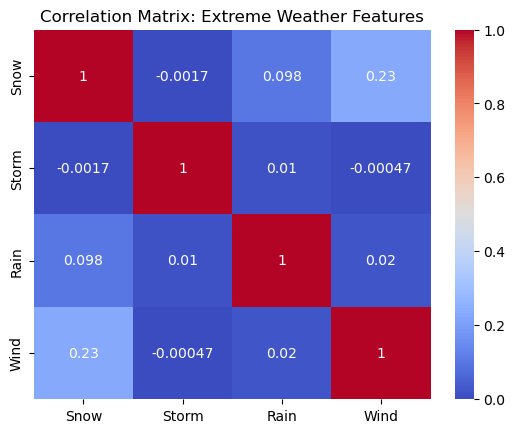

In [34]:
sns.heatmap(
    df_data[['snow_value_mm', 'duration_minutes_storm', 'rain_value_mm', 'wind_speed_mean']].corr(), 
    annot=True, 
    cmap='coolwarm',
    xticklabels=['Snow', 'Storm', 'Rain', 'Wind'], 
    yticklabels=['Snow', 'Storm', 'Rain', 'Wind']
)
plt.title('Correlation Matrix: Extreme Weather Features')
plt.savefig('impact_corr_matrix.png', bbox_inches='tight')
plt.show()


<hr>

#### Cleaning the SEDS data

In [35]:
# Load CSV
df = pd.read_csv(r"EIA_raw.csv")
df.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


In [36]:
df.count()

Unnamed: 0           2242317
period               2242317
seriesId             2242317
seriesDescription    2242317
stateId              2242317
stateDescription     2242317
value                2242317
unit                 2242317
dtype: int64

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB
None


In [38]:
print(df.isnull().sum())

Unnamed: 0           0
period               0
seriesId             0
seriesDescription    0
stateId              0
stateDescription     0
value                0
unit                 0
dtype: int64


In [39]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # Print first 10 unique values
    print("-" * 40)

print(df.describe())


seriesId: 886 unique values
['ZWHDP' 'ZWCDP' 'WZTCB' 'WZEIB' 'WYTXP' 'WYTXB' 'WYTCP' 'WYTCB' 'WYICP'
 'WYICB']
----------------------------------------
seriesDescription: 712 unique values
['Heating degree days (HDD)' 'Cooling degree days (CDD)'
 'Waste, excluding biodiesel, total consumption'
 'Waste, excluding biodiesel, consumed by the electric power sector'
 'Wind energy total end-use net generation'
 'Wind energy total end-use consumption'
 'Wind electricity total net generation' 'Wind energy total consumption'
 'Wind electricity net generation in the industrial sector'
 'Wind energy consumed by the industrial sector']
----------------------------------------
stateId: 52 unique values
['VA' 'FL' 'DE' 'DC' 'AL' 'AK' 'WI' 'CT' 'WA' 'VT']
----------------------------------------
stateDescription: 52 unique values
['Virginia' 'Florida' 'Delaware' 'District of Columbia' 'Alabama' 'Alaska'
 'Wisconsin' 'Connecticut' 'Washington' 'Vermont']
----------------------------------------
unit: 

In [40]:
# Filter to keep only solar and wind energy
df = df[df['seriesId'].isin(['SOTGP', 'WYTCP'])]

# Remove rows where net power generation is zero
df = df[df['value'] != 0]

# Drop index column if it's just a leftover
df = df.drop(columns=['Unnamed: 0', 'seriesId', 'seriesDescription', 'stateDescription', 'unit'])

# Drop rows where target is missing
df = df[df['value'].notna()]

# Show columns for sanity check
print("Columns:", df.columns)


Columns: Index(['period', 'stateId', 'value'], dtype='object')


#### Cleaning the Extreme Weather data

#### Combining the two datasets and preparing for model training

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # Separate features and target
# X = df.drop(columns=['value'])
# y = df['value']

# # Detect column types
# categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline([
#             ('imputer', SimpleImputer(strategy='mean')),
#             ('scaler', StandardScaler())
#         ]), numerical_cols),
        
#         ('cat', Pipeline([
#             ('imputer', SimpleImputer(strategy='most_frequent')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ]), categorical_cols)
#     ]
# )

# # Apply preprocessing
# X_processed = preprocessor.fit_transform(X)

# # Split into train/test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_processed, y, test_size=0.2, random_state=42
# )

<hr>

#### Model: Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression


#### Model: Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor


#### Model: Support Vector Regression

In [44]:
from sklearn.svm import SVR
